## Day 25 Lecture 1 Assignment

In this assignment, we will evaluate the performance of the model we built yesterday on the Chicago traffic crash data. We will also perform hyperparameter tuning and evaluate a final model using additional metrics (e.g. AUC-ROC, precision, recall, etc.)

Since we will be building on the model we built in the last assignment, we will need to redo all of the data preparation steps up to the point of model building. These steps include creating the response, missing value imputation, and one-hot encoding our selected categorical variables. The quickest way to get going would be to open last week's assignment, make a copy, and build on it from there.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def missingness_summary(df, print_log=False, sort='none'):
    summary = df.apply(lambda x: x.isna().sum() / x.shape[0])
    
    if print_log == True:
        if sort == 'none':
            print(summary)
        elif sort == 'ascending':
            print(summary.sort_values())
        elif sort == 'descending':
            print(summary.sort_values(ascending=False))
        else:
            print('Invalid value for sort parameter.')
        
    return summary

In [3]:
crash = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv')

In [4]:
# answer goes here

#crash['NEW_DAMAGE'] = (crash['DAMAGE'] == 'OVER $1,500').astype(int)

crash['NEW_DAMAGE'] = np.where(crash['DAMAGE'] == 'OVER $1,500', 1, 0)

In [5]:
crash['NEW_DAMAGE'].value_counts()

1    209921
0    162664
Name: NEW_DAMAGE, dtype: int64

In [6]:
# answer goes here
# crash = crash.drop(labels=[['LANE_CNT','INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I','PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I','DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I']], axis=1, inplace=True) 

filtered = crash.dropna(thresh=crash.shape[0]*0.95,how='all',axis=1)

#cols = ['BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
#       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN']

for col in filtered.columns:
    if filtered[col].dtypes != 'O': 
        filtered[col].fillna(filtered[col].median(), inplace=True)

In [7]:
filtered.dropna(inplace=True)

In [8]:
missingness_summary(filtered)

RD_NO                            0.0
CRASH_DATE                       0.0
POSTED_SPEED_LIMIT               0.0
TRAFFIC_CONTROL_DEVICE           0.0
DEVICE_CONDITION                 0.0
WEATHER_CONDITION                0.0
LIGHTING_CONDITION               0.0
FIRST_CRASH_TYPE                 0.0
TRAFFICWAY_TYPE                  0.0
ALIGNMENT                        0.0
ROADWAY_SURFACE_COND             0.0
ROAD_DEFECT                      0.0
REPORT_TYPE                      0.0
CRASH_TYPE                       0.0
DAMAGE                           0.0
DATE_POLICE_NOTIFIED             0.0
PRIM_CONTRIBUTORY_CAUSE          0.0
SEC_CONTRIBUTORY_CAUSE           0.0
STREET_NO                        0.0
STREET_DIRECTION                 0.0
STREET_NAME                      0.0
BEAT_OF_OCCURRENCE               0.0
NUM_UNITS                        0.0
MOST_SEVERE_INJURY               0.0
INJURIES_TOTAL                   0.0
INJURIES_FATAL                   0.0
INJURIES_INCAPACITATING          0.0
I

In [9]:
crash_scenario = filtered.filter(['POSTED_SPEED_LIMIT', 'INJURIES_TOTAL','NEW_DAMAGE'])

In [10]:
weather = pd.get_dummies(filtered['WEATHER_CONDITION'], drop_first=True)
crash_scenario = pd.concat([crash_scenario, weather], axis=1)


crash_type = pd.get_dummies(filtered['FIRST_CRASH_TYPE'], drop_first=True)
crash_scenario = pd.concat([crash_scenario, crash_type], axis=1)

In [11]:
crash_scenario.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362483 entries, 6 to 372584
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   POSTED_SPEED_LIMIT            362483 non-null  int64  
 1   INJURIES_TOTAL                362483 non-null  float64
 2   NEW_DAMAGE                    362483 non-null  int32  
 3   CLEAR                         362483 non-null  uint8  
 4   CLOUDY/OVERCAST               362483 non-null  uint8  
 5   FOG/SMOKE/HAZE                362483 non-null  uint8  
 6   FREEZING RAIN/DRIZZLE         362483 non-null  uint8  
 7   OTHER                         362483 non-null  uint8  
 8   RAIN                          362483 non-null  uint8  
 9   SEVERE CROSS WIND GATE        362483 non-null  uint8  
 10  SLEET/HAIL                    362483 non-null  uint8  
 11  SNOW                          362483 non-null  uint8  
 12  UNKNOWN                       362483 non-nul

In [12]:
from sklearn.model_selection import train_test_split

X = crash_scenario.drop('NEW_DAMAGE', axis=1)
Y = crash_scenario['NEW_DAMAGE']

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [13]:
import statsmodels.api as sm

X_train_con = sm.add_constant(X_train)

Statsmodels' implementation of logistic has certain advantages over scikit-learn's, such as clean, easy to read model summary output and statistical inference values (e.g. p-values). However, scikit-learn is preferable for model evaluation, so we will switch to the scikit-learn implementation for this exercise. 

Run logistic regression on the training set and use the resulting model to make predictions on the test set. Calculate the train and test error using logarithmic loss. How do they compare to each other?

*model name = model1*

I forgot what you're prediction model and training models are. Update the following codes to populate the information.
>*I updated the code below.*

In [14]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(max_iter=1000)
logit.fit(x_test, y_test)

LogisticRegression(max_iter=1000)

In [15]:
model1 = sm.Logit(Y_train, X_train_con).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.657845
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             NEW_DAMAGE   No. Observations:               289986
Model:                          Logit   Df Residuals:                   289956
Method:                           MLE   Df Model:                           29
Date:                Fri, 16 Oct 2020   Pseudo R-squ.:                 0.04019
Time:                        11:14:37   Log-Likelihood:            -1.9077e+05
converged:                       True   LL-Null:                   -1.9875e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.5920      0.558      1.061      0.289      -0.501       1.685
POSTED_SPEED_LIMIT               0.0115      0.001     19.461      0.000       0.010       0.013
INJURIES_TOTAL                   0.7393      0.012     61.928      0.000       0.716       0.763
CLEAR                           -0.2660      0.558     -0.477      0.633      -1.359       0.827
CLOUDY/OVERCAST                 -0.1530      0.558     -0.274      0.784      -1.247       0.941
FOG/SMOKE/HAZE                  -0.0919      0.565     -0.163      0.871      -1.200       1.016
FREEZING RAIN/DRIZZLE            0.3278      0.588      0.557      0.577      -0.825       1.480
OTHER                           -0.0119      0.562     -0.021      0.983      -1.113       1.089
RAIN                            -0.1360      0.558     -0.244      0.807      -1.229       0.957
SEVERE CROSS WIND GATE           0.4927      0.630      0.782      0.434      -0.742       1.727
SLEET/HAIL                      -0.0734      0.567     -0.129      0.897      -1.184       1.037
SNOW                            -0.1351      0.558     -0.242      0.809      -1.229       0.958
UNKNOWN                         -0.1111      0.558     -0.199      0.842      -1.205       0.982
ANIMAL                          -0.9863      0.145     -6.795      0.000      -1.271      -0.702
FIXED OBJECT                     0.0594      0.024      2.516      0.012       0.013       0.106
HEAD ON                         -0.0493      0.047     -1.048      0.295      -0.141       0.043
OTHER NONCOLLISION              -1.1223      0.065    -17.204      0.000      -1.250      -0.994
OTHER OBJECT                    -0.6640      0.041    -16.003      0.000      -0.745      -0.583
OVERTURNED                       0.7852      0.250      3.143      0.002       0.296       1.275
PARKED MOTOR VEHICLE            -0.4811      0.015    -31.765      0.000      -0.511      -0.451
PEDALCYCLIST                    -2.4749      0.040    -61.890      0.000      -2.553      -2.397
PEDESTRIAN                      -2.3916      0.032    -74.189      0.000      -2.455      -2.328
REAR END                        -0.6808      0.015    -45.806      0.000      -0.710      -0.652
REAR TO FRONT                   -0.7317      0.068    -10.820      0.000      -0.864      -0.599
REAR TO REAR                    -0.7193      0.134     -5.368      0.000      -0.982      -0.457
REAR TO SIDE                    -0.6313      0.085     -7.417      0.000      -0.798      -0.465
SIDESWIPE OPPOSITE DIRECTION    -0.6643      0.033    -19.928      0.000      -0.730      -0.599
SIDESWIPE SAME DIRECTION        -0.6529      0.016    -41.228      0.000      -0.684      -0.622
TRAIN                            0.8380      0.766      1.094      0.274      -0.663       2.339
TURNING                         -0.1956      0.017    -11.819      0.000      -0.228      -0.163
========================================

In [16]:
logit.score(X_train, Y_train)

0.5832867793617623

In [17]:
logit.score(x_test, y_test)

0.5824103066333779

In [18]:
from sklearn.metrics import confusion_matrix
results = logit.predict(x_test)
confusion_matrix(y_test, results)

array([[12878, 18962],
       [11312, 29345]], dtype=int64)

In [19]:
train_prob = logit.predict_proba(X_train)
test_prob = logit.predict_proba(x_test)

>*Editor's note: Added log_loss here but also added the predicted probability rates above with train_prob and test_prob since it's the probabilities that are needed for log_loss*

In [20]:
from sklearn.metrics import log_loss
print('Test error through log loss: {:.5f}'.format(log_loss(y_test, test_prob)))
print('Train error through log loss: {:.5f}'.format(log_loss(Y_train, train_prob)))

Test error through log loss: 0.65816
Train error through log loss: 0.65807


>*Since the errors are almost equal, there is no underfitting nor overfitting happening but they are notably over 0.6 - an indication that something may be wrong in the binary class.*

Next, evaluate the performance of the same model using 10-fold CV. Use the training data and labels, and print out the mean log loss for each of the 10 CV folds, as well as the overall CV-estimated test error. How do the estimates from the individual folds compare to the result from our previous single holdout set? How much variability in the estimated test error do you see across the 10 folds?

Note: scikit-learn's *cross_val_score* function provides a simple, one-line method for doing this. However, be careful - the default score returned by this function may not be log loss!

In [33]:
from sklearn.model_selection import cross_val_score

cv_train = cross_val_score(logit, X_train, Y_train, cv=10)
print('--Train Data--')
print('Mean: {:.5f} Std: {:.4f}\n{}'.format(cv_train.mean(), cv_train.std(), cv_train))

cv_test = cross_val_score(logit, x_test, y_test, cv=10)
print('\n--Test Data--')
print('Mean: {:.5f} Std: {:.4f}\n{}'.format(cv_test.mean(), cv_test.std(), cv_test))

--Train Data--
Mean: 0.58366 Std: 0.0018
[0.58191662 0.58133039 0.58405462 0.58074416 0.58591676 0.58491672
 0.58314367 0.58297124 0.58541968 0.58621284]

--Test Data--
Mean: 0.58242 Std: 0.0025
[0.57958621 0.58468966 0.584      0.57958621 0.58427586 0.57889655
 0.58110345 0.58628776 0.58118361 0.58463236]


Scikit-learn's logistic regression function has a built-in regularization parameter, C (the larger the value of C, the smaller the degree of regularization). Use a loop with values of C, and find the optimum C value by taking the highest average cross validation score.

In [35]:
cv_values = []
c_vals = [.05, 1.5, 150, 1500, 15000]
for i in c_vals:
    logit = LogisticRegression(C=i)
    cv = cross_val_score(logit, X_train, Y_train, cv=5)
    cv_values.append(cv.mean())

In [39]:
cv_values

[0.5836868061449647,
 0.5830660843834943,
 0.5840695802835507,
 0.583424724396411,
 0.5832523032902618]

>*C=150 netted us the highest average cross validation score*

Re-train a logistic regression model using the best value of C identified by 10-fold CV on the training data and labels. Afterwards, do the following:

- Determine the precision, recall, and F1-score of our model using a cutoff/threshold of 0.5 (hint: scikit-learn's *classification_report* function may be helpful)
- Plot or otherwise generate a confusion matrix (SEE ABOVE)
- Plot the ROC curve for our logistic regression model

Note: the performance of our simple logistic regression model with just four features will not be very good, but this is not entirely unexpected. There are many other features that can be incorporated into the model to improve its performance; feel free to experiment!

In [61]:
logit = LogisticRegression(max_iter=1000, C=150)
logit.fit(X_train, Y_train)

LogisticRegression(C=150, max_iter=1000)

In [91]:
results = logit.predict(x_test)
confusion_matrix(y_test, results)

array([[ 9442, 22398],
       [ 7911, 32746]], dtype=int64)

# Calculate Metrics
Print the F1, F beta, precision, recall and accuracy scores.

In [58]:
train_pred = logit.predict(X_train)
print(classification_report(Y_train, train_pred))

              precision    recall  f1-score   support

           0       0.55      0.30      0.39    126959
           1       0.60      0.81      0.69    163027

    accuracy                           0.58    289986
   macro avg       0.57      0.55      0.54    289986
weighted avg       0.57      0.58      0.55    289986



In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
def CalculateMetrics(y_test, predictions):
  return {'accuracy': accuracy_score(y_test, predictions),
   'precision': precision_score(y_test, predictions),
   'recall': recall_score(y_test, predictions),
   'f1': f1_score(y_test, predictions),
   'fbeta_precision' : fbeta_score(y_test, predictions, 0.5),
   'fbeta_recall' : fbeta_score(y_test, predictions, 2)}

CalculateMetrics(y_test, results)

{'accuracy': 0.5824103066333779,
 'precision': 0.6074688968472478,
 'recall': 0.7217699289175296,
 'f1': 0.6597050492333978,
 'fbeta_precision': 0.627338221775659,
 'fbeta_recall': 0.6955934292554579}

# Plot ROC Curve and AUC
Calculate AUC and plot the curve.

Area under the ROC curve: 0.615


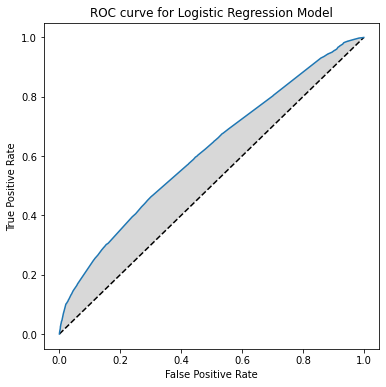

In [92]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
probs = lr.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))

fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, 'grey', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

# Plot Precision-Recall Curve
Plot the precision-recall curve for the model above.

Find the best value for C in the Logistic Regression Classifier for avoiding overfitting. Plot the training and testing accuracy over a range of C values from 0.05 to 1.5.

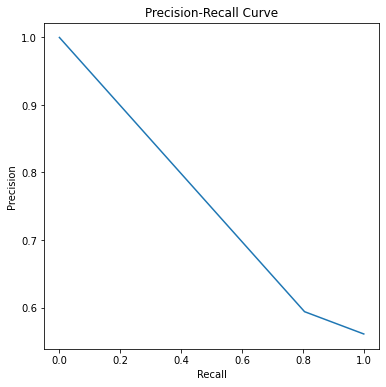

In [93]:
#Do A little work to figure this one out
from sklearn.metrics import precision_recall_curve
pres, rec, thresholds = precision_recall_curve(y_test, results)

fig = plt.figure(figsize = (6, 6))
plt.plot(rec, pres)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()